In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [3]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
45,4.8,3.0,1.4,0.3,setosa
63,6.1,2.9,4.7,1.4,versicolor
147,6.5,3.0,5.2,2.0,virginica
7,5.0,3.4,1.5,0.2,setosa
82,5.8,2.7,3.9,1.2,versicolor


In [4]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

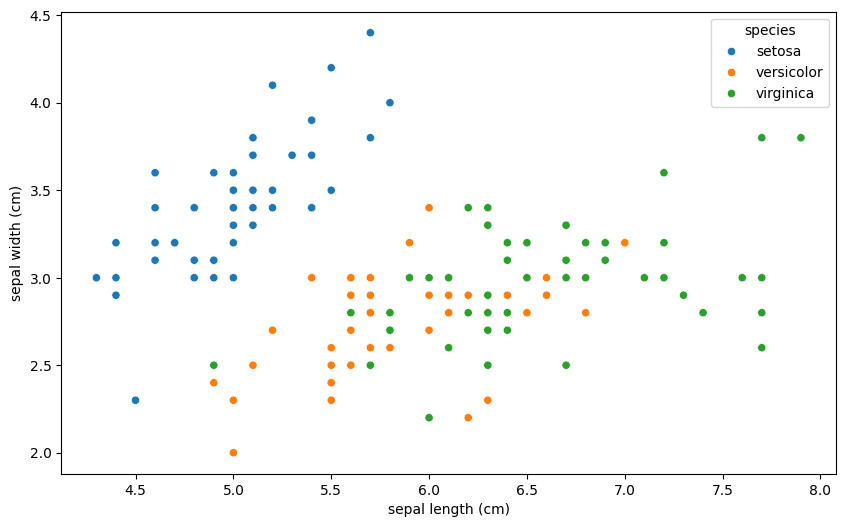

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')

In [10]:

from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target



<Axes: xlabel='petal width (cm)', ylabel='Density'>

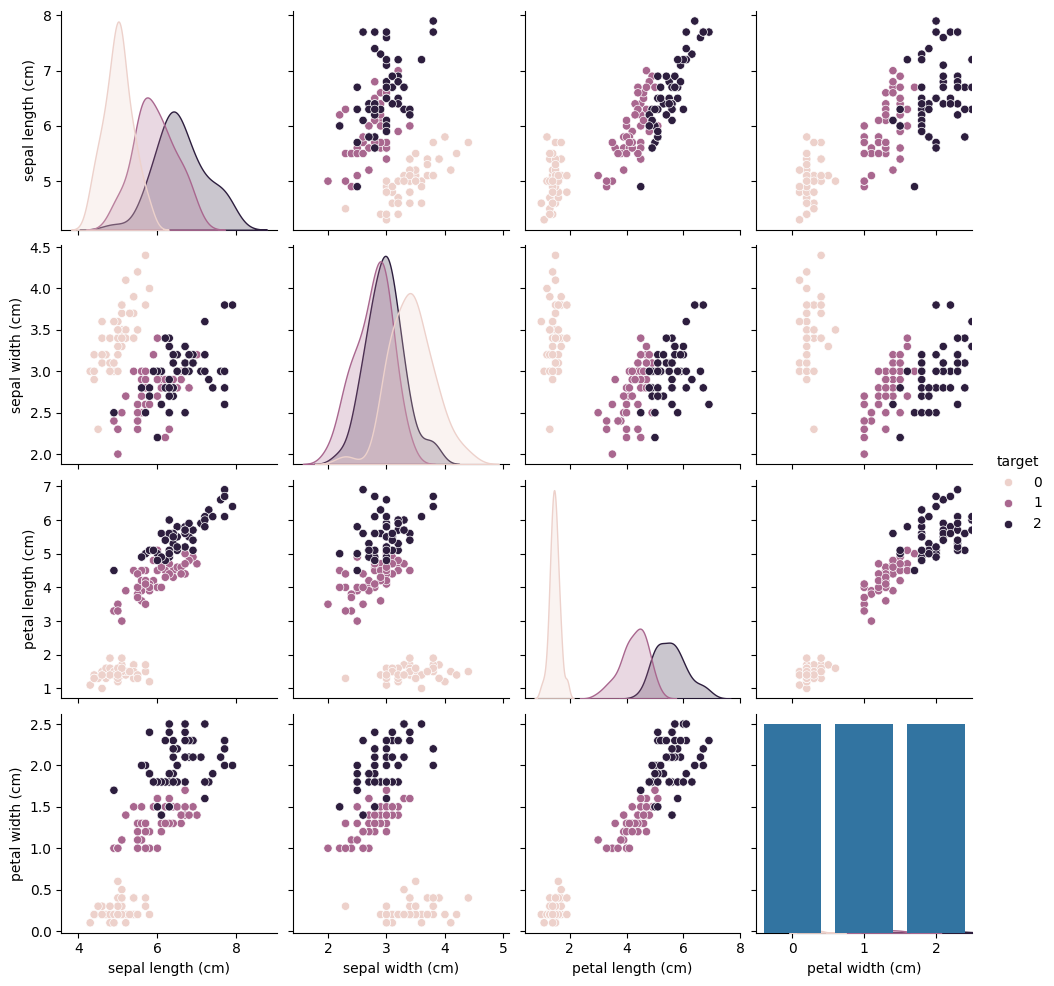

In [12]:
sns.pairplot(df, hue='target')          # Pairwise plots
sns.countplot(x='target', data=df)      # Class distribution


<Axes: >

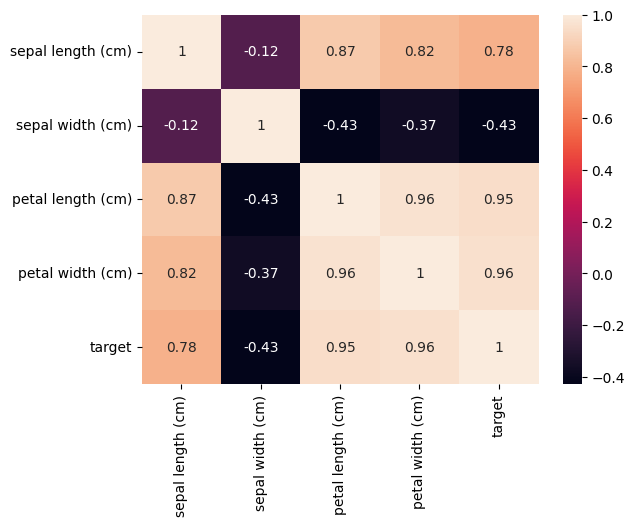

In [13]:
sns.heatmap(df.corr(), annot=True)      # Correlation heatmap


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 1.0


In [16]:
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
  """
  Predicts the species of an iris based on its measurements.

  Args:
    sepal_length: The sepal length in cm.
    sepal_width: The sepal width in cm.
    petal_length: The petal length in cm.
    petal_width: The petal width in cm.

  Returns:
    The predicted species of the iris.
  """
  # Create a pandas DataFrame from the input values
  input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                            columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

  # Make a prediction using the trained model
  prediction = model.predict(input_data)

  # Map the predicted class index to the species name
  predicted_species = iris.target_names[prediction[0]]

  return predicted_species



In [25]:
# Example usage:
# Assuming you have values for sepal_length, sepal_width, petal_length, and petal_width
print(predict_iris_species(	6.1,	2.9,	4.7	,1.4))

versicolor
